# Data Manipulation in Python (CS2006 P2)

In [28]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt;
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import operator
plotly.tools.set_credentials_file(username='ir47', api_key='k0qjUbd6owGLygMXJPZ5')

In [2]:
df=pd.read_csv("../data/CometLanding.csv",encoding="UTF-8")

In [3]:
len(df)

77319

In [4]:
df.drop_duplicates(['id_str'],inplace = True)

In [5]:
numTweets = len(df)

In [6]:
print("Total number of Tweets: " + str(numTweets))

Total number of Tweets: 77268


In [7]:
df = df[df['text'].notnull()]

In [8]:
len(df['from_user'].unique())

50195

In [9]:
language = df.groupby('user_lang')

In [10]:
language.size()

user_lang
ar           428
bg             1
ca           309
cs            42
da            89
de          2916
el            29
en         52316
en-AU          1
en-GB         23
en-gb       1972
es          7540
es-MX          2
eu            62
fa             2
fi           108
fil           10
fr          3313
gl            36
he             2
hi             2
hu            41
id            66
it          2664
ja          1514
ko            98
msa            1
nb             1
nl           838
no            36
pl           157
pt           508
pt-PT          1
ro             8
ru           794
sv           126
th            57
tr           761
uk            43
ur             1
vi             1
xx-lc         24
zh-CN          6
zh-Hans        6
zh-cn        285
zh-tw         27
dtype: int64

In [11]:
dfNoRT = df[~df.text.str.startswith('RT', na=False)]

In [12]:
numReTweets = numTweets - len(dfNoRT) 

In [13]:
print("Total number of retweets: " + str(numReTweets))

Total number of retweets: 59999


In [14]:
dfReplies = df[~df.text.str.contains('@', na=False)]

In [15]:
numReplies = len(dfReplies)

In [16]:
print("Total number of replies: " + str(numReplies))

Total number of replies: 10624


In [17]:
import re
hashtags = []
for index, row in dfNoRT.iterrows():
    text = (row['text'].split(" "))
    for token in text:
        if token.startswith('#'):
            hashtags.append(token)



In [18]:
hashtagCount = {}

for hashtag in hashtags:
    if hashtag not in hashtagCount:
        hashtagCount[hashtag] = 1
    else:
        counter = hashtagCount.get(hashtag,'none')
        hashtagCount.update({hashtag: counter+1})
        
for key,val in hashtagCount.items():
    print (key, "=>", val)
    


(u'#sgp', '=>', 1)
(u'#Agilkia!', '=>', 1)
(u'#divulgazione', '=>', 1)
(u'#BER', '=>', 2)
(u'##cometlanding', '=>', 2)
(u'#Agilkia,', '=>', 3)
(u'#Unterrichtsmaterial', '=>', 1)
(u'#SpaceEvent', '=>', 1)
(u'#Universe?', '=>', 1)
(u'#autoinculpacions9N\n\n2014/11/12', '=>', 1)
(u'#ScientistChic', '=>', 1)
(u'#Live', '=>', 9)
(u'#GFB', '=>', 1)
(u'#To', '=>', 1)
(u'#InternetDeLasCosas', '=>', 1)
(u'#TT', '=>', 4)
(u'#TV', '=>', 1)
(u'#banter', '=>', 1)
(u'#entendu', '=>', 1)
(u'#SonyAlpha)', '=>', 1)
(u'#nowbeer', '=>', 1)
(u'#Miranda', '=>', 1)
(u'#CatMigdia', '=>', 1)
(u'#BallondOr2014', '=>', 1)
(u'#Italy.', '=>', 1)
(u"#KimKardashian's", '=>', 1)
(u'#GodIsGood', '=>', 1)
(u'#androidify', '=>', 1)
(u'#crunchtime', '=>', 1)
(u'#Supernatural200thEpisode\n\n2014/11/12', '=>', 4)
(u'#SimonOwen', '=>', 1)
(u'#Rosetta-Piloten:', '=>', 1)
(u'#photography.\nhttp://t.co/8HVEz3vopc\nTrue', '=>', 1)
(u'#CometLanding\n#RejectedMuppets\n#JapanSeries\n#OpSKYNET\n#Supernatural200thEpisode', '=>', 1)

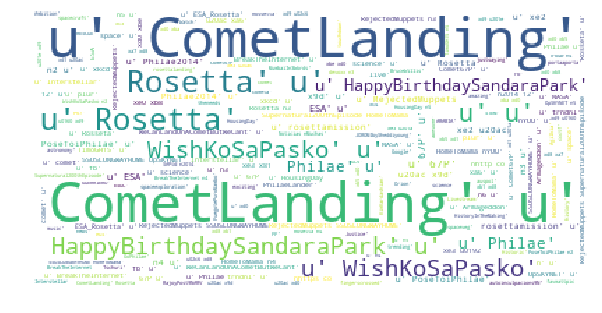

In [19]:
words = []

for key,val in hashtagCount.items():
    words.append(key)
    
words = [e[1:] for e in words]
stopwords = set(STOPWORDS)
stopwords.add("CometLanding")


wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=30000,max_font_size=40, random_state=42).generate(str(hashtags))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
data = [go.Bar(x=['Tweets', 'Retweets', 'Replies'],y=[numTweets,numReTweets,numReplies])]
layout = go.Layout(
    title='Number of Retweets, Replies and Tweets',
    yaxis=dict(
        title='Usage',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

In [29]:
dfSource = df
import re
items = []
for index, row in dfSource.iterrows():
    text = (row['source'])
    for token in str(text):
        if token.endswith('>'):
            split1 = text.split("</a>")
            split2 = str(split1).split(">")
            split2 = str(split2).split(",")
            items.append(str(split2[1]))
            
appCount = {}

for device in items:
    if device not in appCount:
        appCount[device] = 1
    else:
        counter = appCount.get(device,'none')
        appCount.update({device: counter+1})

In [30]:
topItems = sorted(appCount.items(), key=operator.itemgetter(1),reverse=True)

In [31]:
#Gets the top 4 applications
topDevice = topItems[0][0]
topDeviceNum = topItems[0][1]
    
secondDevice = topItems[1][0]
secondDeviceNum = topItems[1][1]
    
thirdDevice = topItems[2][0]
thirdDeviceNum = topItems[2][1]

fourthDevice = topItems[3][0]
fourthDeviceNum = topItems[3][1]

In [32]:
data = [go.Bar(x=[topDevice,secondDevice,thirdDevice,fourthDevice],
               y=[topDeviceNum,secondDeviceNum,thirdDeviceNum,fourthDeviceNum])]
layout = go.Layout(
    title='Top applications used to send tweets',
    yaxis=dict(
        title='Usage',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

figure = go.Figure(data=data, layout=layout)
py.iplot(figure, filename='basic-bar2')
